# Выявление закономерностей успешности игр

**Цель**: выявить определяющие успешность игры закономерности, чтобы выявить потенциально популярный продукт и спланировать рекламные компании.

**Описание данных**:
+ Name — название игры
+ Platform — платформа
+ Year_of_Release — год выпуска
+ Genre — жанр игры
+ NA_sales — продажи в Северной Америке (миллионы проданных копий)
+ EU_sales — продажи в Европе (миллионы проданных копий)
+ JP_sales — продажи в Японии (миллионы проданных копий)
+ Other_sales — продажи в других странах (миллионы проданных копий)
+ Critic_Score — оценка критиков (максимум 100)
+ User_Score — оценка пользователей (максимум 10)
+ Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Первичное изучение информации

In [1]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# в переменную data положим данные о играх
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

# посмотрим первые 5 строк датафрейма
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# с помощью метода info() получаем общую информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#посмотрим пропуски
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
# посмотрим есть ли явные дубликаты в данных
data.duplicated().sum()

0

Итак, когда известна информация о данных, можно составить план по их обработке:

1. Для удобства необходимо привести все названия колонок к змеиному регистру.
2. Заменить типы данных в столбце Year_of_Release на int64, так как года это целые числа. 
3. Рассмотреть почему у колонки User_Score тип object.
3. Обработать пропуски, где это возможно.
4. Нужно создать столбец с суммарными продажами. Это упростить дальнейшую работу с данными.


<div style="border:solid blue 2px; padding: 20px">
    
        После предварительного просмотра данных, стало понятно, какие у нас есть данные, какие типы у этих данных, есть ли явные дубликаты и сколько в таблице пропусков. 
    Также был составлен план для дальнейшей обработки данных.
    
</div>

---

## Предобработка данных

Прежде чем обрабатывать пропуски, стоит изменить регистр колонок. После этого можно заняться обработкой пропусков.

In [6]:
# приведём все названия к змеиному регистру
data.columns = data.columns.str.lower()

### Обработка пропусков

Теперь начнём работу с пропусками. 

Все эти пропуски могли случится по разным причинам: некорректная выгрузка данных, мог выграть человеческий фактор (данную в таблицу просто забыли внести), сложно было определить жанр игры, игра могла на момент заполнения таблицы ещё не выйти, также могла произойти ситуация, что для разных игр была применена разная система оценивания и так далее.

По данным из первого пункта видно, что пропусков в имени, году и жанре не много, но стоит проверить какую долю они занимают от общего массива данных, прежде чем их удалять.

Для проверки возьмём колонку без пропусков и сложим пропуски в перечисленных колонках. Если данных окажется меньше 5%, то их можно удалять.

In [7]:
na_col = data['name'].isna().sum() + data['year_of_release'].isna().sum() + data['genre'].isna().sum()
full = data['platform'].count()
na_col/full * 100

1.6332635357463356

Итак, 1 процент данных можно удалить без искажения самих данных

In [8]:
data.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

Все эти пропуски могли случится по разным причинам: некорректная выгрузка данных, мог выграть человеческий фактор (данную в таблицу просто забыли внести), сложно было определить жанр игры и так далее.

Колонка `user_score` имеет тип object, так как там встречается оценка `tbd` (To Be Determined, то есть "Будет определено"). По сути эта оценка значит, что либо игра ещё не вышла, либо рейтинг не определён. Поэтому данное значение можно заменить пропусками.

In [9]:
data['user_score'] = data['user_score'].replace('tbd', float('nan'))

In [10]:
# преобразуем формат float в int
data['year_of_release'] = data['year_of_release'].astype('int')
# преобразуем из object в float
data['user_score'] = data['user_score'].astype(float)

Пропуски в остальных столбах лучше не трогать, так как это может исказить данные. Однако, можно найти закономерности, но для начала преобразуем типы данных для дальнейшей корректной работы кода.

### Создание столбца суммарных продаж 

In [11]:
data['total_sale'] = data['na_sales'] + data['eu_sales'] + data['other_sales'] + data['jp_sales']

<div style="border:solid blue 2px; padding: 20px">
    
        Итак, подготовка данных окончена: названия колонок приведены к нужному регистру, 
    удалены пропуски, заменены типы данных и сощдан столбец с суммарными продажами во 
    всех регионах.
    
</div>

---

## Исследовательский анализ данных

### Выпуск игр по годам

После подготовки данных необходимо исследовать можество вещей. Начнём с данных по годам: проверим количество игр в каждом году и оценим важность конкретного года для нашего анализа. Для удобства я сразу построю график и выведу таблицу.

In [12]:
# таблица с количеством игр по годам
data_year_count = data.pivot_table(index='year_of_release', values = 'name', aggfunc='count')
data_year_count.columns = ['количество игр в этом году']
data_year_count

,количество игр в этом году
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


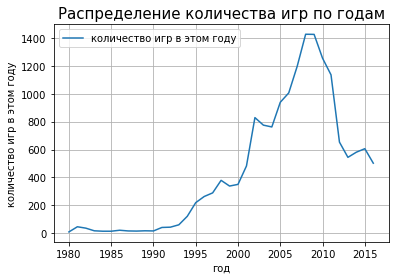

In [13]:
# график с количеством игр по годам
data_year_count.plot(grid=True)
plt.title('Распределение количества игр по годам').set_size(15)
plt.xlabel('год')
plt.ylabel('количество игр в этом году')
plt.show()

Итак, можно увидеть, что меньше всего игр до 1991, далее количество игр начинает рости. Поэтому можно сделать вывод, что данные с 1980 по 1990 имеют слабое влияение на весь датасет. С 2000 по 2010 было наибольшее количество игр, пик выпуска которых был в 2008 году. С 2011 года количество выпущенных игр стало уменьшаться.

### Продажи по платформам

В данном пункте будут определяться платформы-лидеры продаж, показано распределение этих продаж по годам. Также будут выявлены сроки появления и исчезнавения платформ с рынка.

In [14]:
# построим топ 10 платформ
data_platform = data.pivot_table(index='platform', values='total_sale', aggfunc='sum').sort_values(by='total_sale', ascending=False)[:10]
data_platform

,total_sale
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Итак, у нас есть топ-10 платформ по продажам, теперь посмотрим их расспределение по годам.

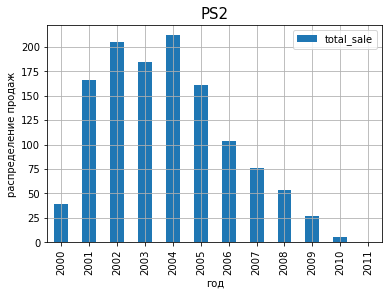

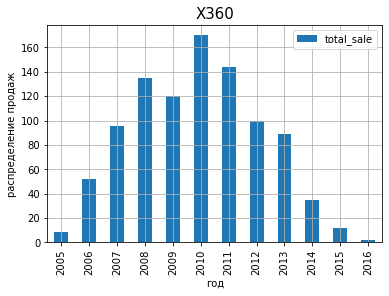

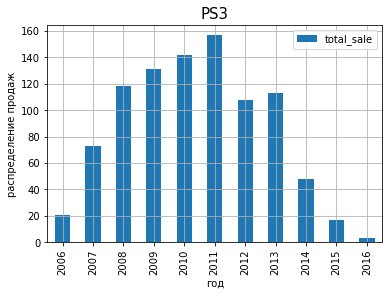

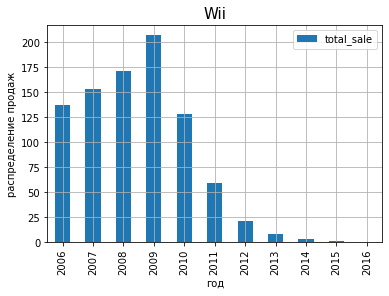

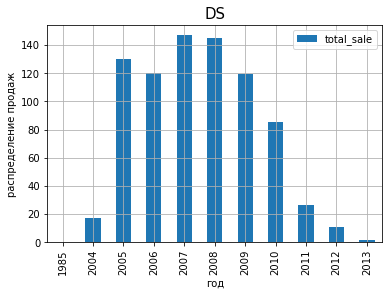

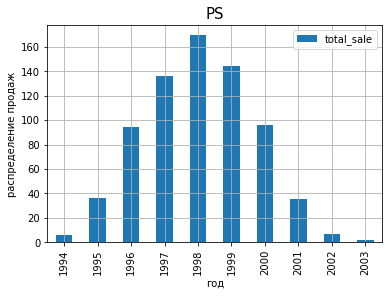

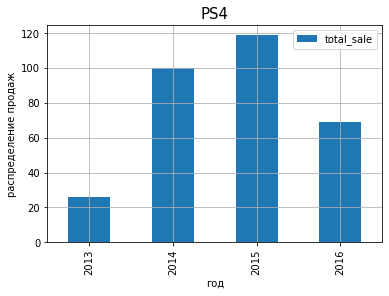

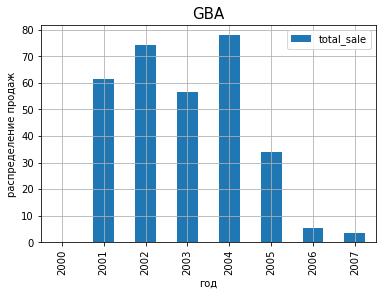

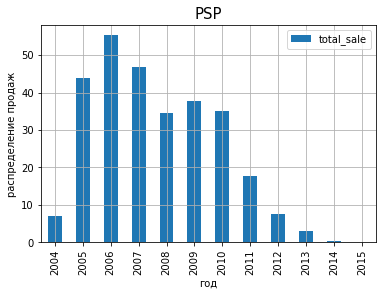

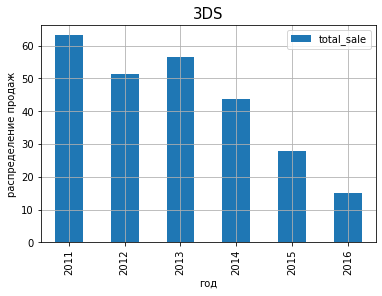

In [15]:
# создадим список топ-10 платформ
top_platform = list(data_platform.index.unique())
# напишем цикл для построения графиков распределения
for platform in top_platform:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sale', aggfunc='sum').plot(grid=True, kind='bar')
    plt.title(platform).set_size(15)
    plt.xlabel('год')
    plt.ylabel('распределение продаж')
    plt.show()

Рассматривая эти данные можно отметить несколько особенностей:
1. Существует один выброс у платформы `DS`. Сложно сказать природу данного выброса, однако, это может быть просто ошибка при выгрузке данных.
2. Самые молодые платформы это `PS4` и `3DS`. Самые долгоживущими платформами были `PS2` и `PSP`, платформа `X360` существует на момент 2016 года, однако продажи идут на спад и вероятнее всего в скором времени прекратит своё существование.
3. Платформы существуют от 4 до 12 лет, при этом средняя продолжительность их "жизни" пример 10 лет. 

*На основе последней найденной особенности сделаем **актуальним периодом** последние 10 лет.*

### Работа с актуальным периодом. Лидерующие компании

In [16]:
#создадим новую таблицу с актуальными данными и с компаниями, которые "живы" на момент 2016 года
new_data = data[data['year_of_release'] > 2006]

year_list = new_data.groupby('platform')['year_of_release'].unique()
platforms = year_list.index
new_platf = []
for i in range(len(platforms)):
    if max(year_list[i]) == 2016:
        new_platf.append(platforms[i])
new_data = new_data[new_data['platform'].isin(new_platf)]

Для определения лидирующих платформ построим круговую диаграмму по суммарным продажам для определения доли платформы на рынке. Далее построим графики суммарных продаж по годам для определения роста или падения продаж по платформам.

Начнём с суммарных значений

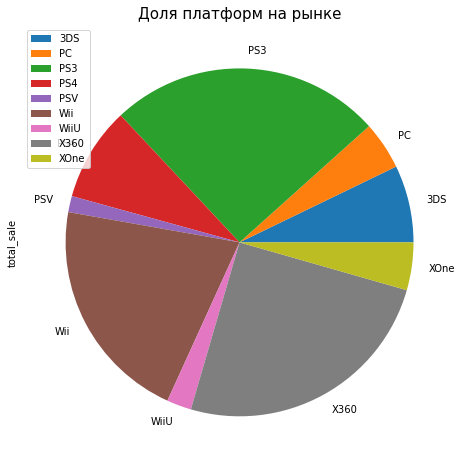

In [17]:
# построим круговую диаграмму
new_data.pivot_table(index='platform', values='total_sale', aggfunc='sum').plot(y='total_sale', kind='pie', figsize=(8,8))
plt.title('Доля платформ на рынке').set_size(15)
plt.show()

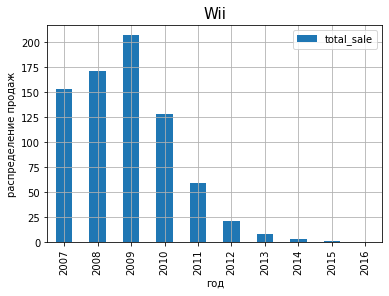

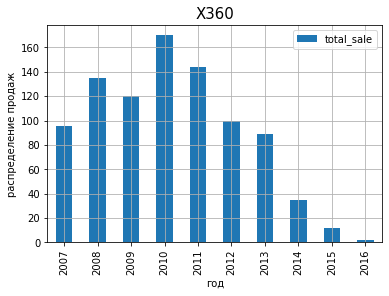

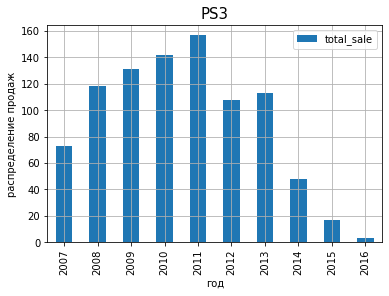

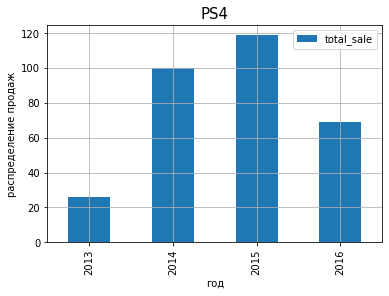

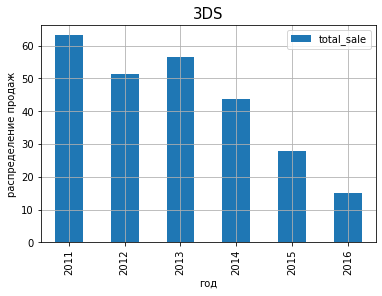

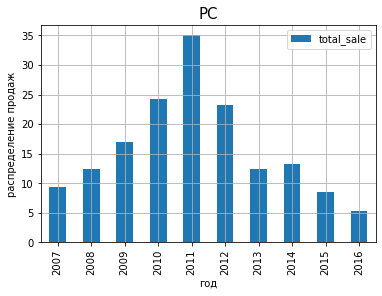

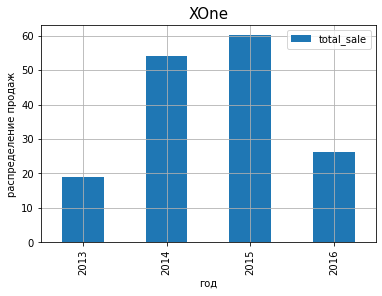

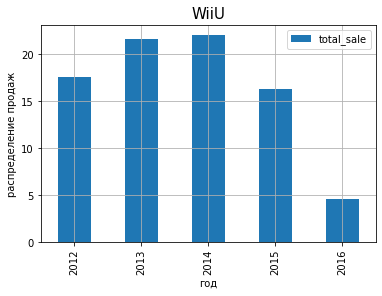

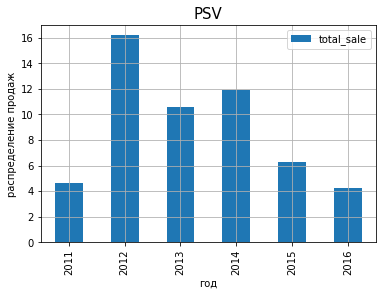

In [18]:
# построим графики распределения продаж по годам
for platform in new_data['platform'].unique():
    new_data[new_data['platform'] == platform].pivot_table(index='year_of_release', values='total_sale', aggfunc='sum').plot(grid=True, kind='bar')
    plt.title(platform).set_size(15)
    plt.xlabel('год')
    plt.ylabel('распределение продаж')
    plt.show()

По круговой диаграмме видно, что лидерами можно назвать 3 платформы: `X360`, `Wii`, `PS3`, однако продажи у этих платформ падают, что не удивительно, ведь появляются новые перспективные платформы, например, `PS4`, `WiiU` и `XOne`. Учитывая, что данные за 2016 год неполные, можно предположить, что продади у этих молодных платформ в дальнейшем будут расти. 

Далее можно определить медианную цену на выбранных трёх платформах, чтобы понять есть ли зависимость между временем, ценой на платформе и суммарными продажами. Предположим, что не все 3 платформы выгодны для вложения в рекламу. Выявим те, в которые выгодно вкладываться.

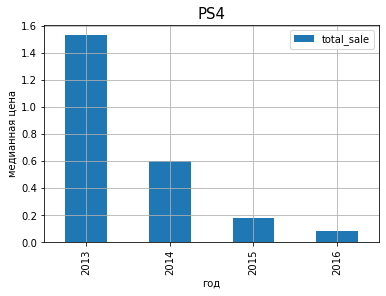

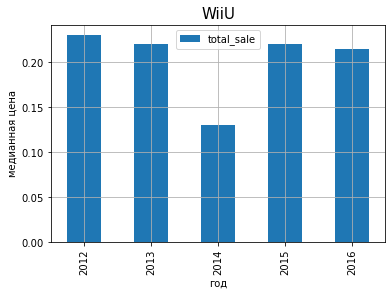

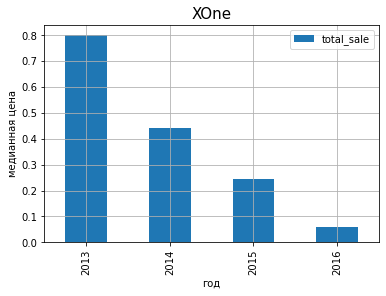

In [19]:
plat = ['PS4', 'WiiU', 'XOne']
for platform in plat:
    new_data[new_data['platform'] == platform].pivot_table(index='year_of_release', values='total_sale', aggfunc='median').plot(grid=True, kind='bar')
    plt.title(platform).set_size(15)
    plt.xlabel('год')
    plt.ylabel('медианная цена')
    plt.show()

Итак, если цена падает, то суммарные продажи растут, если цена на продукт падает. То есть идёт следующая зависимость: чем ниже цена, тем больше продаж. Это не удивительно, так как платформы живут недолго и постоянно повышать цены нельзя, так как есть большая конкуренция. 

### Диаграмма размаха

Для работы до начала построим каждую диаграмму размаха отдельно, затем для сравнения на 1 графике. 

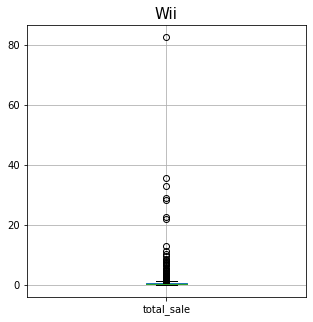

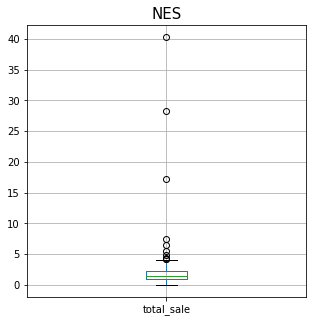

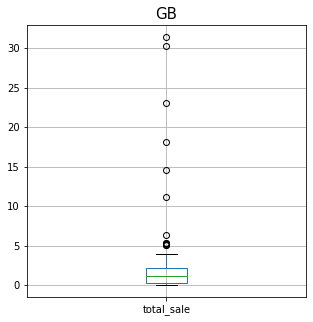

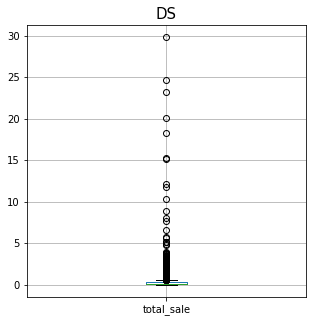

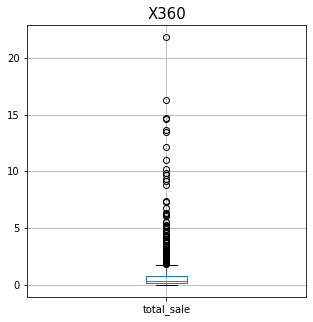

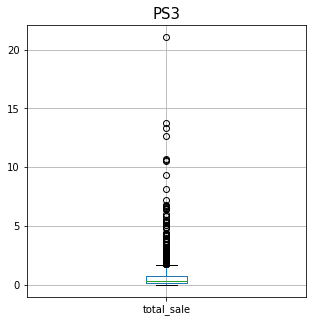

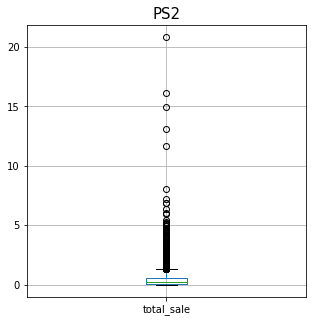

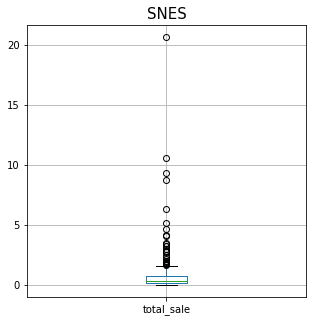

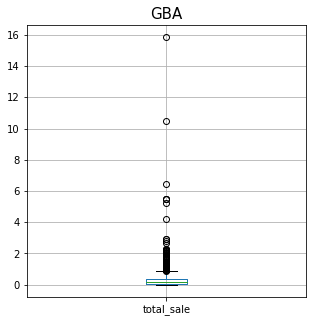

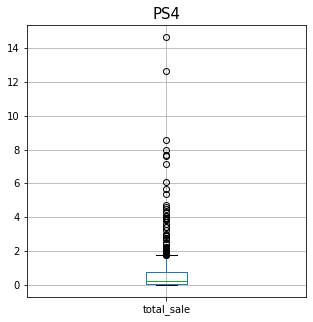

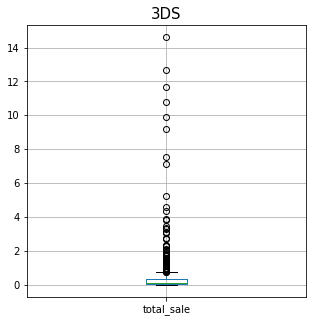

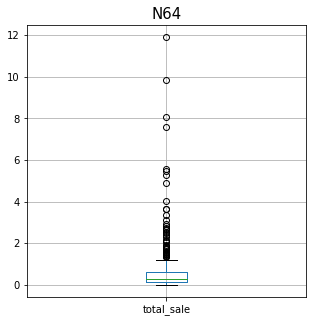

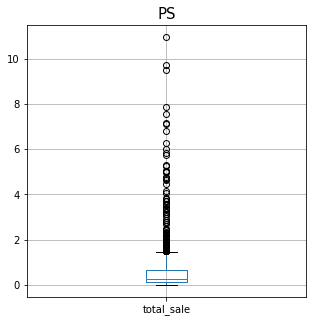

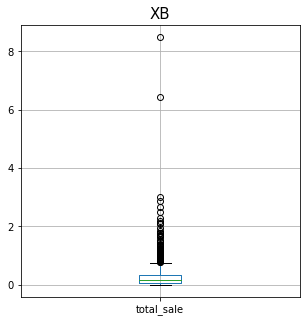

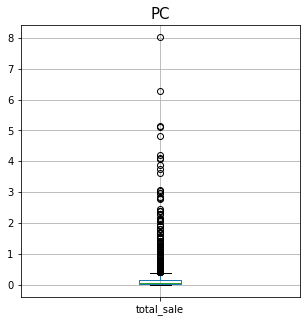

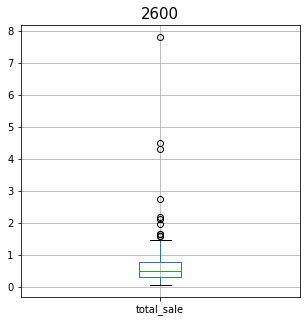

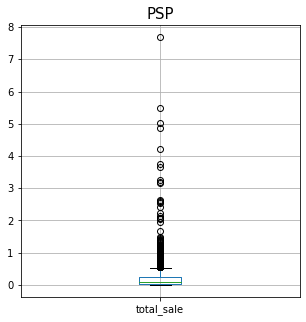

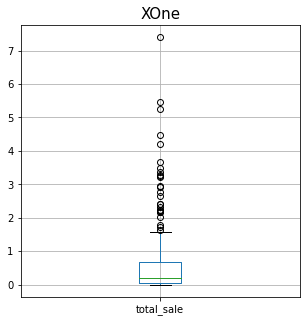

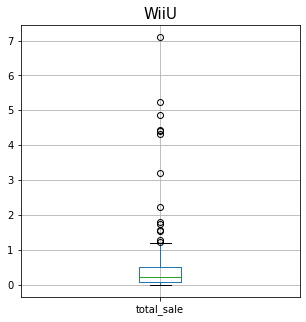

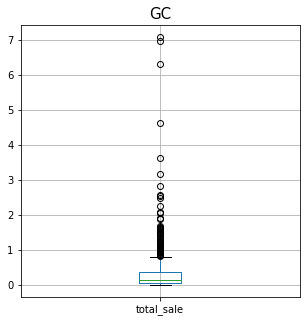

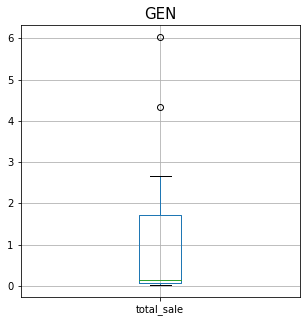

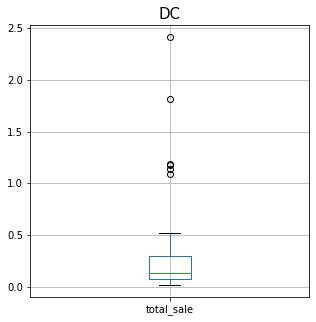

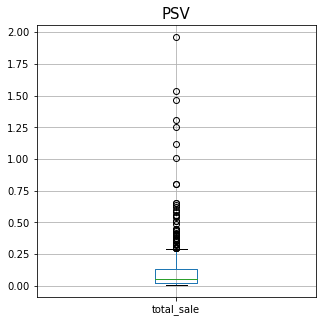

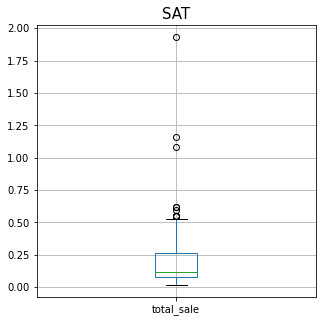

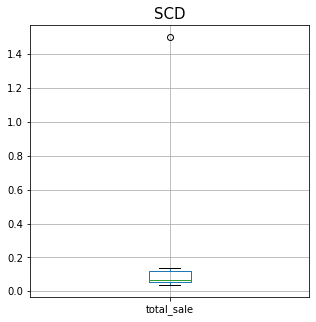

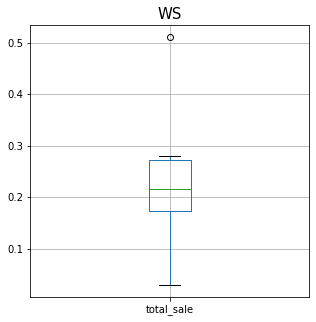

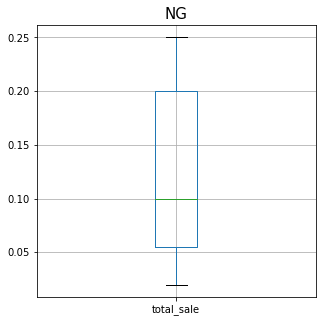

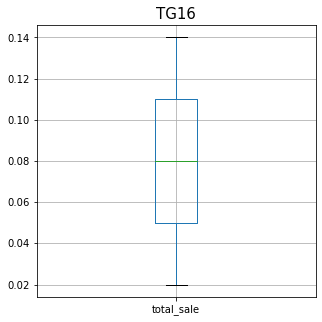

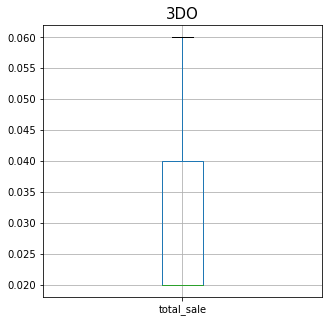

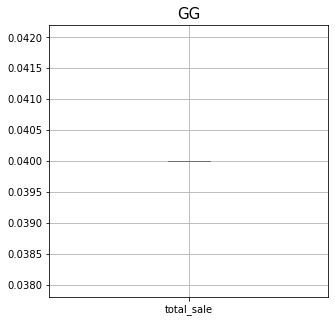

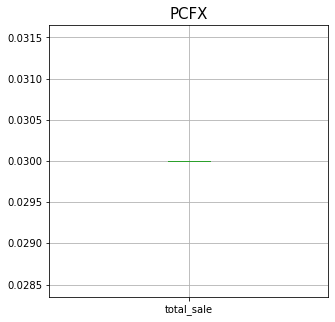

In [20]:
for platform in data['platform'].unique():
    data[data['platform'] == platform].boxplot(column='total_sale', figsize=(5,5))
    plt.title(platform).set_size(15)
    plt.show()

<AxesSubplot:title={'center':'total_sale'}, xlabel='platform'>

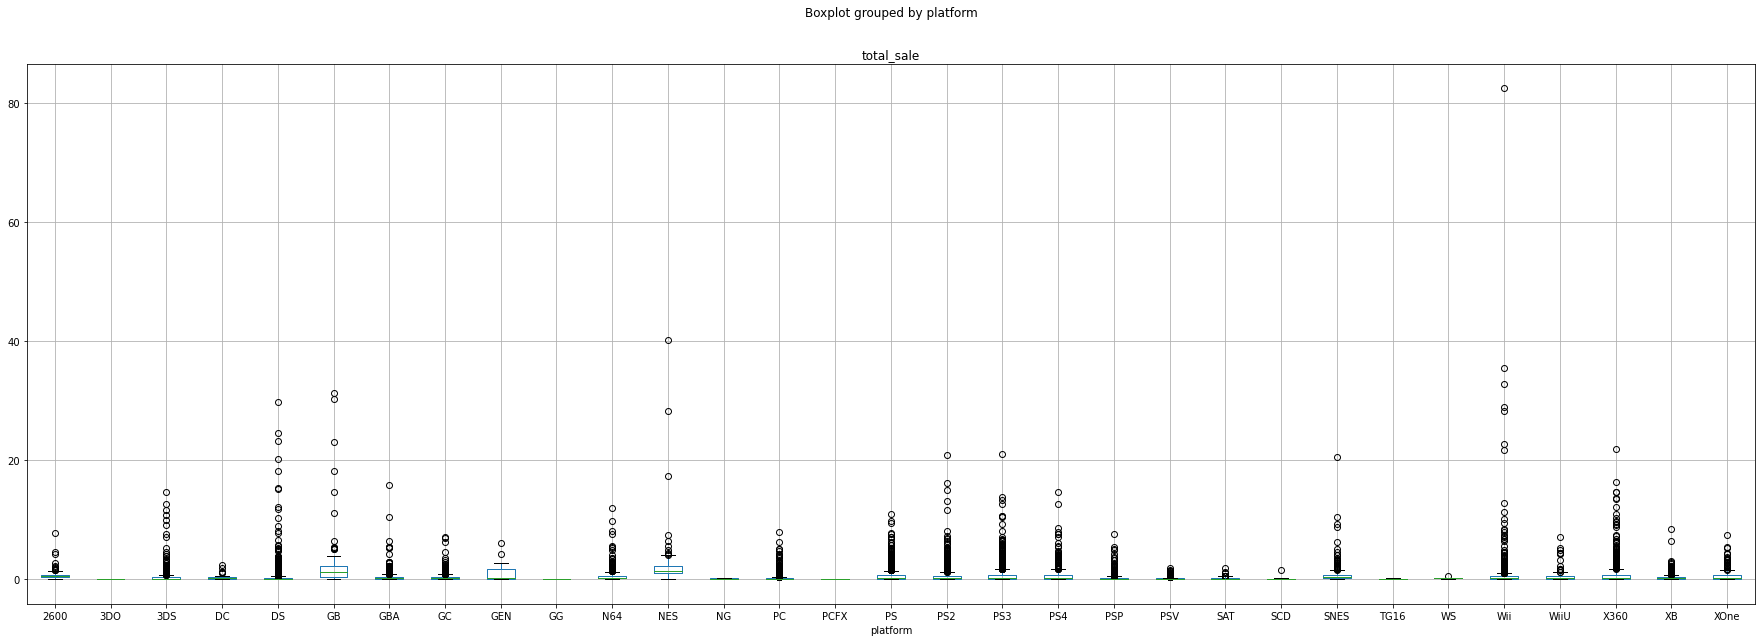

In [21]:
data.boxplot(column='total_sale', by='platform', figsize=(30,10))

Выбросы не дают объективно оценить данные, поэтому ограничим область продаж до 2,5 млн

(0.0, 2.5)

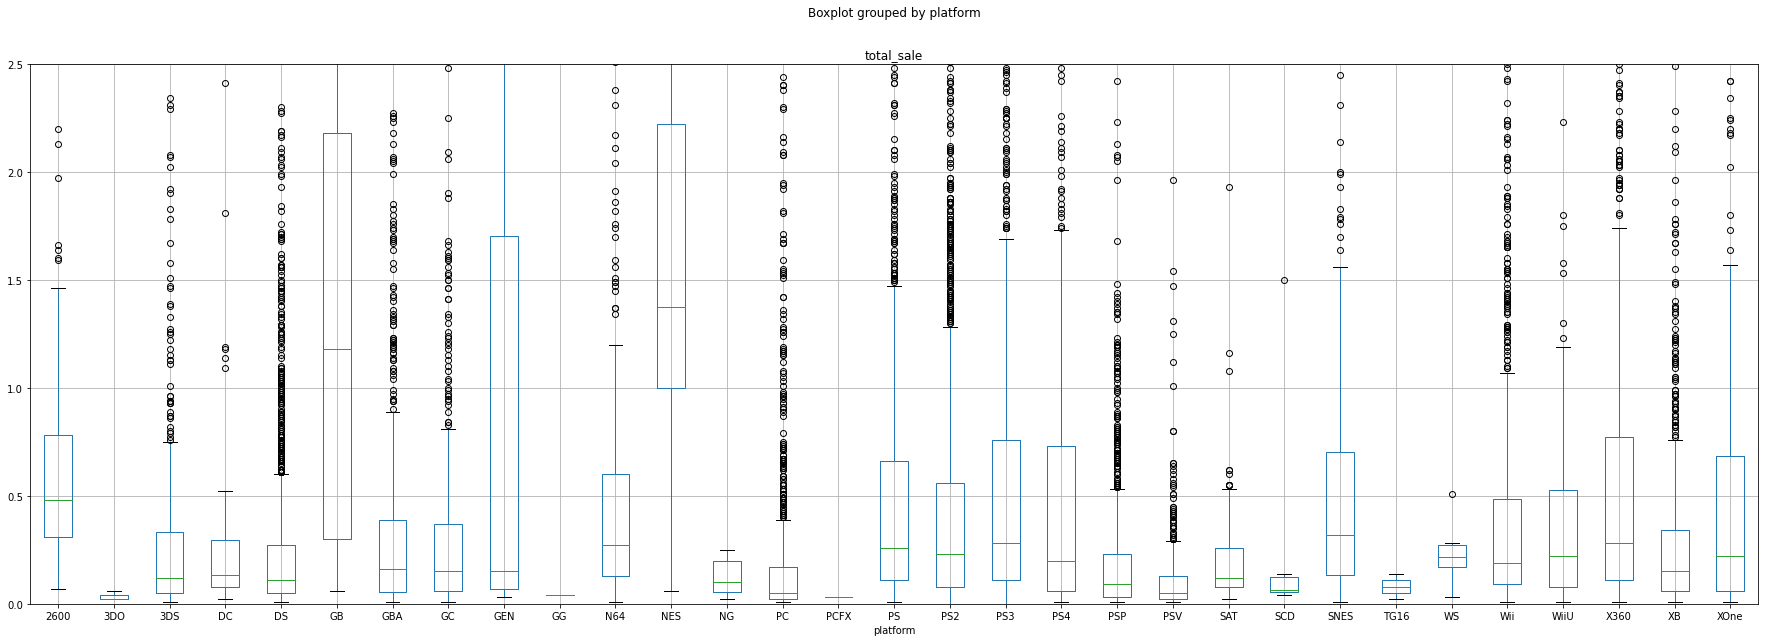

In [22]:
# ограничим продажи до 2,5 млн
data.boxplot(column='total_sale', by='platform', figsize=(30,10))
plt.ylim(0, 2.5)

Итак, по графикам видно, что в данных присутствует большое количество выбросов, при этом самый большой у Wii. Выбросы лучше не трогать, так как есть очень популярные игры, которые могли покупаться большим тиражом. Медиана распределена у всех платформ по разному, при чём у всех платформ, кроме NES и GB, она лежит в промежутке от 0 до 0,5 млн.

### Работа с отзывами

До начала создадим список платформ, в котором не будет платформ без отзывов.

In [23]:
no_na_score = []
for platform in data['platform'].unique():
    if (len(data[data['platform'] == platform]) - data[data['platform'] == platform]['critic_score'].isna().sum() != 0) and (len(data[data['platform'] == platform]) - data[data['platform'] == platform]['user_score'].isna().sum() != 0):
        no_na_score.append(platform)

Напишем функцию для вывода графиков и корреляций.

In [24]:
# импортируем библиотеку warnings, чтобы Питон не выдавал ошибку при построении графика
import warnings
warnings.filterwarnings("ignore")
# напишем функцию для отображения графиков и корреляции
def plat(platform):
    #графики
    data_plat = data[data['platform']==platform]
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    data_plat.plot(x='user_score', y='total_sale', kind='scatter', alpha=0.5, figsize=(10,5), grid=True, ax=ax[0])
    data_plat.plot(x='critic_score', y='total_sale', kind='scatter', alpha=0.5, figsize=(10,5), grid=True, ax=ax[1])
    fig.suptitle(platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Продажи')
    ax[1].set(ylabel='Продажи')
    plt.show()
    
    #корреляция
    print('Корреляция продаж с отзывами критиков:', data_plat['total_sale'].corr(data_plat['critic_score']))
    print('Корреляция продаж с отзывами пользователей:', data_plat['total_sale'].corr(data_plat['user_score']))

Рассмотрим как влияли отзывы критиков и пользователей на продажи внутри популярной платформы. Возьмём относительно актуальную(существующую но момент 2016), но при этом не совсем новую платформу(существует больше 5 лет). Под данные параметры подходит `PS3`.

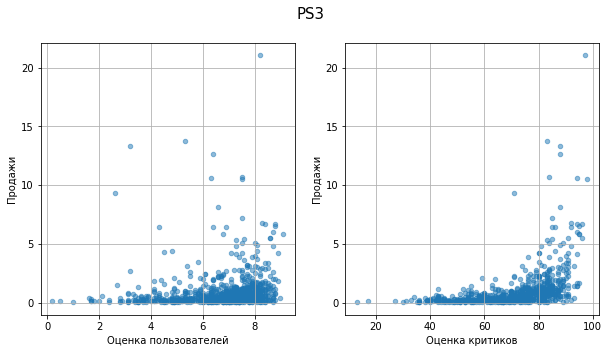

Корреляция продаж с отзывами критиков: 0.43275895789971397
Корреляция продаж с отзывами пользователей: 0.1284156293856302


In [25]:
plat('PS3')

Корреляция между отзывами и продажами имеется прямая зависимость. Пользователи больше орбарают внимание на отзывы критиков.

Теперь проверим, даст ли такой же результат исследование других платформ.

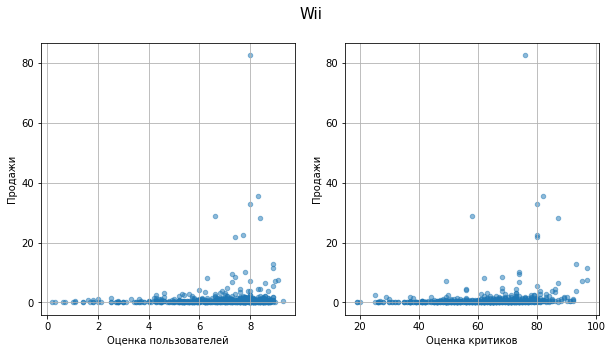

Корреляция продаж с отзывами критиков: 0.17790728577594936
Корреляция продаж с отзывами пользователей: 0.11283121360773782


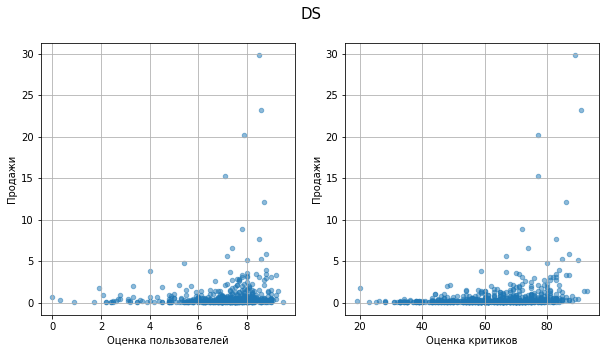

Корреляция продаж с отзывами критиков: 0.23754579854113494
Корреляция продаж с отзывами пользователей: 0.1308760097584421


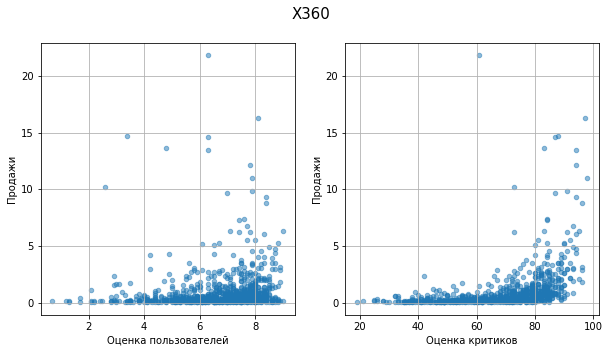

Корреляция продаж с отзывами критиков: 0.39286589254007026
Корреляция продаж с отзывами пользователей: 0.11418661214018032


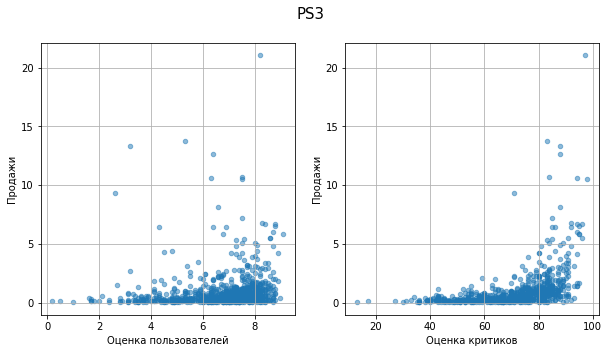

Корреляция продаж с отзывами критиков: 0.43275895789971397
Корреляция продаж с отзывами пользователей: 0.1284156293856302


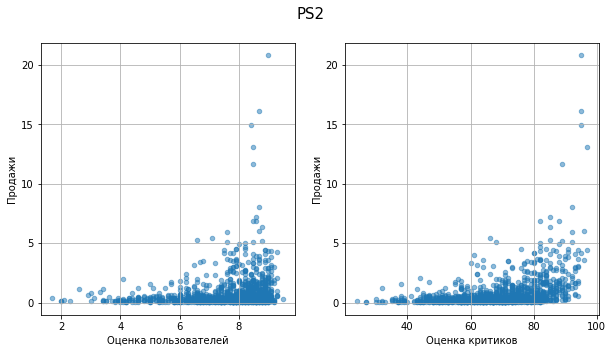

Корреляция продаж с отзывами критиков: 0.3925364754450903
Корреляция продаж с отзывами пользователей: 0.1750550277038373


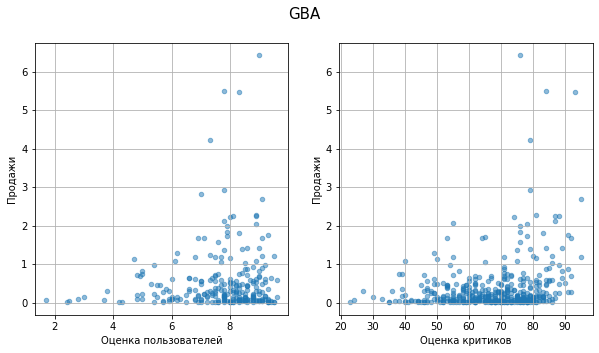

Корреляция продаж с отзывами критиков: 0.24210693503333325
Корреляция продаж с отзывами пользователей: 0.10614935050585185


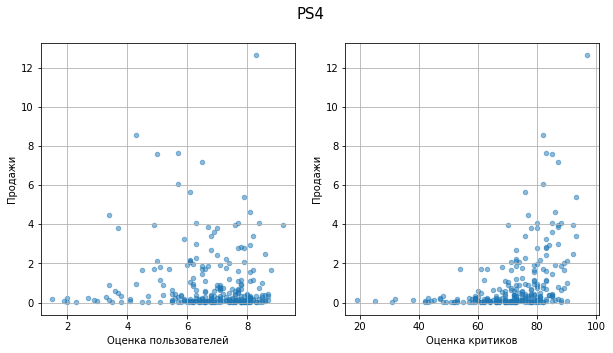

Корреляция продаж с отзывами критиков: 0.40656790206178123
Корреляция продаж с отзывами пользователей: -0.03195711020455643


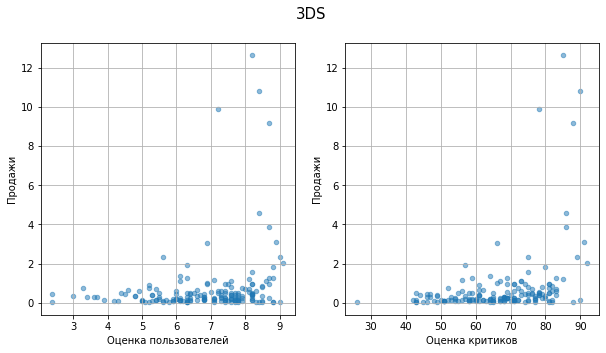

Корреляция продаж с отзывами критиков: 0.3487397305984834
Корреляция продаж с отзывами пользователей: 0.22207843643390884


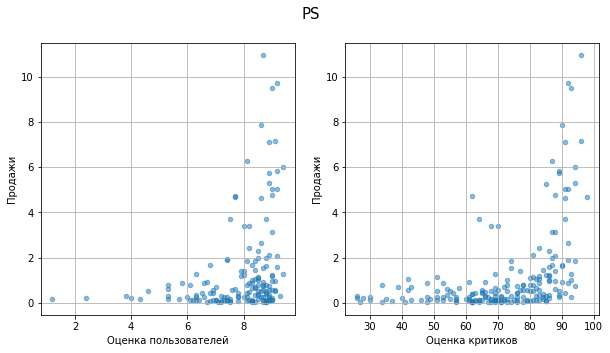

Корреляция продаж с отзывами критиков: 0.4466897788670505
Корреляция продаж с отзывами пользователей: 0.3000775353440939


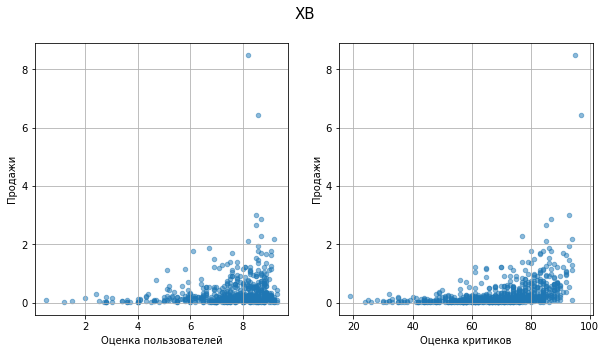

Корреляция продаж с отзывами критиков: 0.3842521985984151
Корреляция продаж с отзывами пользователей: 0.17487617185324528


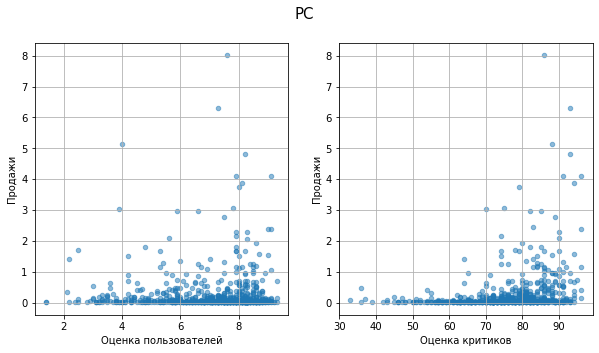

Корреляция продаж с отзывами критиков: 0.2573947184009854
Корреляция продаж с отзывами пользователей: 0.012904741611451175


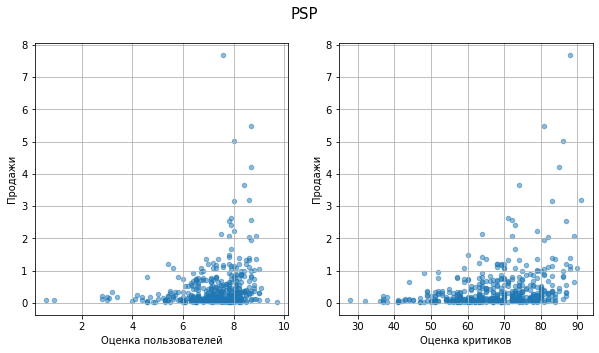

Корреляция продаж с отзывами критиков: 0.3175245100513485
Корреляция продаж с отзывами пользователей: 0.22089026723044378


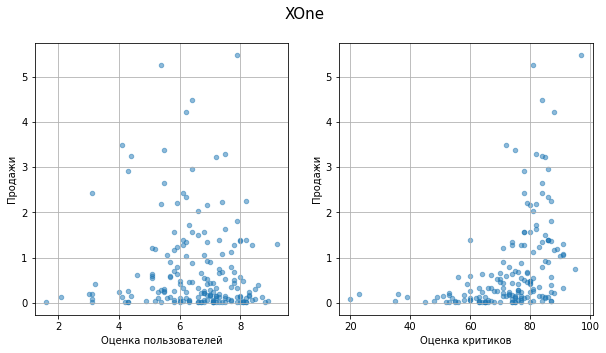

Корреляция продаж с отзывами критиков: 0.41699832800840153
Корреляция продаж с отзывами пользователей: -0.06892505328279416


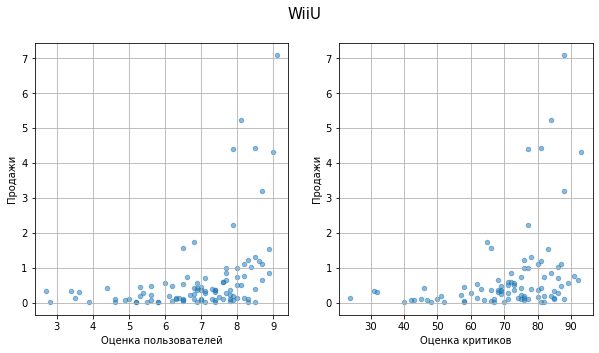

Корреляция продаж с отзывами критиков: 0.348379760120175
Корреляция продаж с отзывами пользователей: 0.4002190202148619


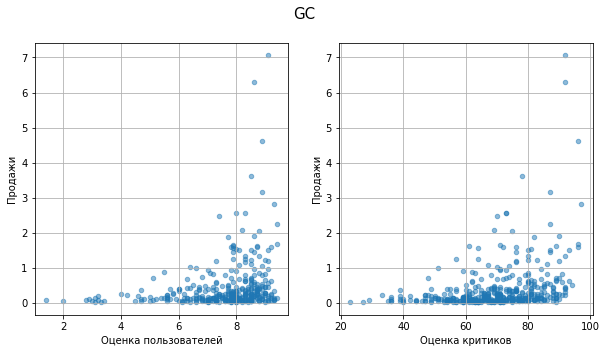

Корреляция продаж с отзывами критиков: 0.3248049846614573
Корреляция продаж с отзывами пользователей: 0.23053811746579284


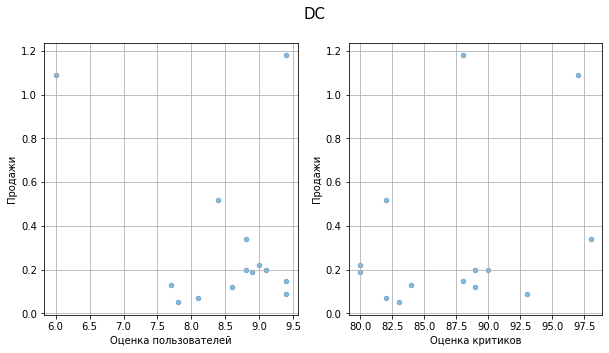

Корреляция продаж с отзывами критиков: 0.35012663552869844
Корреляция продаж с отзывами пользователей: -0.3033991581195412


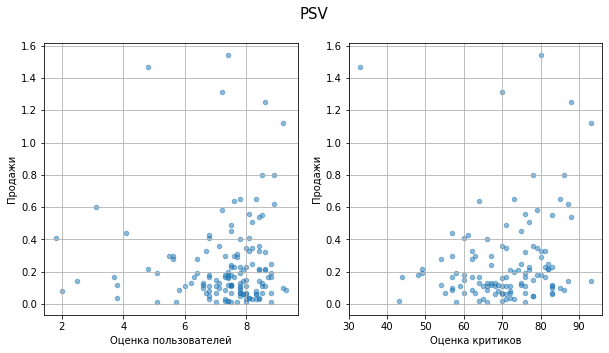

Корреляция продаж с отзывами критиков: 0.13176292727608932
Корреляция продаж с отзывами пользователей: 0.01348875683588647


In [26]:
for platform in no_na_score:
    plat(platform)

Итак, действительно корреляция везде положительная и отзывы критиков более весомые, нежели отзывы пользователей. Стоит учитывать, что корреляция слабая и нет ни одного значения больше 0.5. Это значит, что отзывы влияют на продажи, но не значительно.

### Работа с жанрами

Теперь по работаем с жанрами игр. Проверим, есть ли самые прибыльные жанры и жанры с самыми низкими продажами. Для этого сравним медианные продажи. 

In [27]:
# создадим таблицу с продажами по жанрам
data.pivot_table(index='genre', values='total_sale', aggfunc='median').sort_values(by='total_sale', ascending=False)


,total_sale
genre,
Platform,0.27
Shooter,0.24
Sports,0.22
Fighting,0.21
Action,0.19
Racing,0.19
Role-Playing,0.18
Misc,0.16
Simulation,0.15


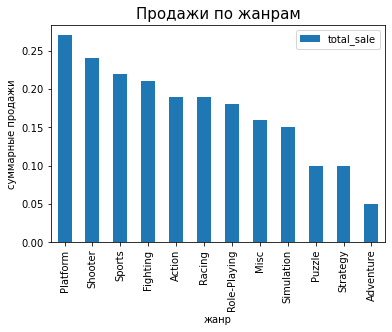

In [28]:
#построим график
data.pivot_table(index='genre', values='total_sale', aggfunc='median').sort_values(by='total_sale', ascending=False).plot(kind='bar')
plt.title('Продажи по жанрам').set_size(15)
plt.xlabel('жанр')
plt.ylabel('суммарные продажи')
plt.show()


Итак, самым прибыльным жанром является platform и shooter. Жанров с низкими продажами несколько: puzzle, adventure, strategy. Значит пользователи во время игры больше любят "выпустить пар" и отдохнуть, в целом не напрягать мозг. Пользователи редко покупают игры, в которых нужно что-то разгадывать, мыслить и так далее.

**ОБЩИЙ ВЫВОД ПО РАЗДЕЛУ:**

<div style="border:solid blue 2px; padding: 20px">
    <p>
        <b>Итогами исследования стали следующие выводы:</b>
    <ol>
        <li>В последние годы игр выпускают всё меньше и меньше, пик выпуска игр был в 2008-2009 годах.</li>
        <li>У многих платформ-долгожителей больше всего суммарных продаж, однако продажи от года к году падают, поэтому самые перспективные платформами существуют не более 5 лет. Такими являются PS4, WiiU и XOne. </li>
        <li>В данных присутсвует большое количество выбросов, причём самый большой выброс у wii. Данная платформа в 2017 году имела большие продажи, а потом продади начали падать.</li>
        <li>Пользователям важнее отзывы критиков и мало кто обращает внимание на отзывы пользователей.</li>
        <li>Самые прибыльные жанры не предпологают сильную нагрузку на мозг, поэтому стоит обратить внимание на игры жанров шуттер и платформер.</li>
    </ol>
    </p>
    
</div>

---

## Портреты жителей разных регионов

Теперь посмотрим портреты жителей регионов. Построим 2 типа портретов: портрет жителя за всё время и портрет современного жителя. Далее сравним эти портреты, чтобы понять как изменились предпочтения за последние годы.

В ходе работы будут определены:
+ популярные платформы
+ популярные жанры
+ влияние ESRB на выбор пользователей

Для каждого пункта будут построены таблицы и графики.

In [29]:
# до начала заполним пропуски в рейтинге заглушками, чтобы избежать искажения результата
data['rating'] = data['rating'].fillna('not defined')

### Портреты за всё время

Начнём с общего портрета, то есть не будем делать срез по годам.

Рассмотрим популярные платформы:

In [30]:
# топ-5 в Японии
jp_s = data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)[:5]
# топ-5 в Северной Америке
na_s = data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)[:5]
# топ-5 в Европе
eu_s = data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)[:5]

In [31]:
print('Toп-5 платформ в Японии:', ', '.join(list(jp_s.index)))
print('Toп-5 платформ в Северной Америке:', ', '.join(list(na_s.index)))
print('Toп-5 платформ в Европе:', ', '.join(list(eu_s.index)))

Toп-5 платформ в Японии: DS, PS, PS2, SNES, 3DS
Toп-5 платформ в Северной Америке: X360, PS2, Wii, PS3, DS
Toп-5 платформ в Европе: PS2, PS3, X360, Wii, PS


In [32]:
# построим общую таблицу
jp_s.join([na_s, eu_s], how='outer')

,jp_sales,na_sales,eu_sales
platform,,,
DS,175.02,380.31,NaN
PS,139.78,NaN,212.39
PS2,137.54,572.92,332.63
SNES,116.55,NaN,NaN
3DS,100.62,NaN,NaN
X360,NaN,595.74,268.32
Wii,NaN,486.87,258.32
PS3,NaN,390.13,327.21


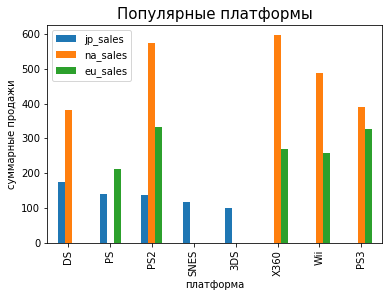

In [33]:
# построим график
jp_s.join([na_s, eu_s], how='outer').plot(kind='bar')
plt.title('Популярные платформы').set_size(15)
plt.xlabel('платформа')
plt.ylabel('суммарные продажи')
plt.show()

Итак, есть 2 платформы, которые популярные только в Японии. Есть только 1 платформа, которая популярна во всех регионах: PS2. Однако, как было описано в предыдущих пунктах, продажи PS2 парают, так как она устарела. Продажи X360 в Америке самые большие. Продажи в Европе на платформах PS2 и PS3 примерно одинаковые.

Теперь рассмотрим жанры:

In [34]:
# топ-5 в Японии
jp_g = data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)[:5]
# топ-5 в Северной Америке
na_g = data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)[:5]
# топ-5 в Европе
eu_g = data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)[:5]

In [35]:
print('Toп-5 жанров в Японии:', ', '.join(list(jp_g.index)))
print('Toп-5 жанров в Северной Америке:', ', '.join(list(na_g.index)))
print('Toп-5 жанров в Европе:', ', '.join(list(eu_g.index)))

Toп-5 жанров в Японии: Role-Playing, Action, Sports, Platform, Misc
Toп-5 жанров в Северной Америке: Action, Sports, Shooter, Platform, Misc
Toп-5 жанров в Европе: Action, Sports, Shooter, Racing, Misc


In [36]:
jp_g.join([na_g, eu_g], how='outer')

,jp_sales,na_sales,eu_sales
genre,,,
Role-Playing,353.39,NaN,NaN
Action,160.14,863.17,510.99
Sports,134.93,671.20,371.33
Platform,130.71,444.44,NaN
Misc,107.02,399.57,210.60
Shooter,NaN,584.83,314.52
Racing,NaN,NaN,234.49


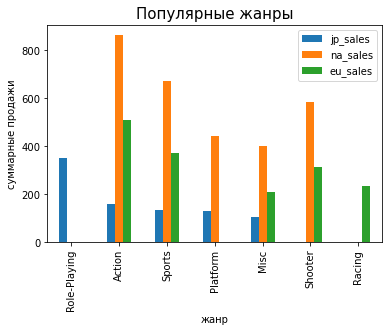

In [37]:
jp_g.join([na_g, eu_g], how='outer').plot(kind='bar')
plt.title('Популярные жанры').set_size(15)
plt.xlabel('жанр')
plt.ylabel('суммарные продажи')
plt.show()

В жанрах есть намного больше пересечений по регонам. По прежнему Экшен-игры лидируют среди жанров, однако в Японии больше любят ролевые игры. 

Наконец, определим влияние рейтинга на выбор пользователей.

In [38]:
# рейтинг в Японии
jp_r = data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
# рейтинг в Северной Америке
na_r = data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
# рейтинг в Европе
eu_r = data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

In [39]:
jp_r.join([na_r, eu_r], how='outer')

,jp_sales,na_sales,eu_sales
rating,,,
not defined,836.74,1225.84,609.65
E,197.96,1274.24,703.87
T,150.70,747.60,421.79
M,63.58,742.89,480.00
E10+,40.20,345.50,183.35
K-A,1.46,2.56,0.27
AO,0.00,1.26,0.61
EC,0.00,1.53,0.11
RP,0.00,0.00,0.03


<AxesSubplot:xlabel='rating'>

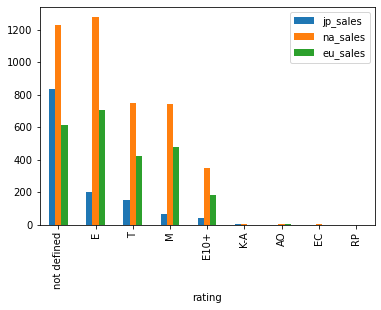

In [40]:
jp_r.join([na_r, eu_r], how='outer').plot(kind='bar')

Рейтинг очень сильно влияет на выбор пользователей, при чём во всех регонах однаково (кроме рейтингов T и М в Европе). Самый популярный рейтинг: E, самый непопулярный: RP.

**Общий партрет пользователя:**

+ `Япония`: пользователь на платформе DS играет в ролевую игру, не обращая внимание на рейтинг.

+ `Северная Америка`: пользователь на платформе X360 играет в экшен игру с рейтингом Е. (Например, в The Legend of Zelda).

+ `Европа`: пользователь на платформе PS2 играет в экшен с рейтингом для всех(Е).

### Портреты за последние 5 лет

Теперь сделаем срез с 2012 по 2016 года.

In [41]:
data_five = data[data['year_of_release'] > 2011]

Поработаем с платформами

In [42]:
# топ-5 в Японии
jp_s = data_five.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)[:5]
# топ-5 в Северной Америке
na_s = data_five.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)[:5]
# топ-5 в Европе
eu_s = data_five.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)[:5]

In [43]:
print('Toп-5 платформ в Японии:', ', '.join(list(jp_s.index)))
print('Toп-5 платформ в Северной Америке:', ', '.join(list(na_s.index)))
print('Toп-5 платформ в Европе:', ', '.join(list(eu_s.index)))

Toп-5 платформ в Японии: 3DS, PS3, PSV, PS4, WiiU
Toп-5 платформ в Северной Америке: X360, PS4, PS3, XOne, 3DS
Toп-5 платформ в Европе: PS4, PS3, X360, XOne, 3DS


In [44]:
# построим общую таблицу
jp_s.join([na_s, eu_s], how='outer')

,jp_sales,na_sales,eu_sales
platform,,,
3DS,87.79,55.31,42.64
PS3,35.29,103.38,106.86
PSV,21.04,NaN,NaN
PS4,15.96,108.74,141.09
WiiU,13.01,NaN,NaN
X360,NaN,140.05,74.52
XOne,NaN,93.12,51.59


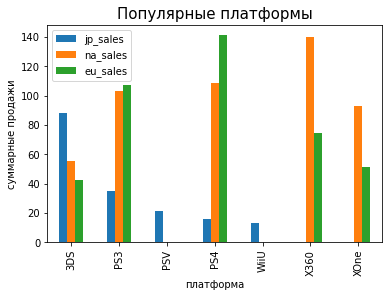

In [45]:
# построим график
jp_s.join([na_s, eu_s], how='outer').plot(kind='bar')
plt.title('Популярные платформы').set_size(15)
plt.xlabel('платформа')
plt.ylabel('суммарные продажи')
plt.show()

Теперь у нас больше пересечений, однако теперь можно заметить, что PS4 является самой популярной в Европе, в Японии самая популярная 3DS, в Америке X360.

Поработаем с жанрами

In [46]:
# топ-5 в Японии
jp_g = data_five.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)[:5]
# топ-5 в Северной Америке
na_g = data_five.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)[:5]
# топ-5 в Европе
eu_g = data_five.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)[:5]

In [47]:
print('Toп-5 жанров в Японии:', ', '.join(list(jp_g.index)))
print('Toп-5 жанров в Северной Америке:', ', '.join(list(na_g.index)))
print('Toп-5 жанров в Европе:', ', '.join(list(eu_g.index)))

Toп-5 жанров в Японии: Role-Playing, Action, Misc, Simulation, Fighting
Toп-5 жанров в Северной Америке: Action, Shooter, Sports, Role-Playing, Misc
Toп-5 жанров в Европе: Action, Shooter, Sports, Role-Playing, Racing


In [48]:
jp_g.join([na_g, eu_g], how='outer')

,jp_sales,na_sales,eu_sales
genre,,,
Role-Playing,65.44,64.00,48.53
Action,52.80,177.84,159.34
Misc,12.86,38.19,NaN
Simulation,10.41,NaN,NaN
Fighting,9.44,NaN,NaN
Shooter,NaN,144.77,113.47
Sports,NaN,81.53,69.09
Racing,NaN,NaN,27.29


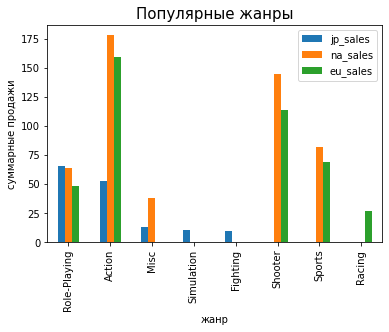

In [49]:
jp_g.join([na_g, eu_g], how='outer').plot(kind='bar')
plt.title('Популярные жанры').set_size(15)
plt.xlabel('жанр')
plt.ylabel('суммарные продажи')
plt.show()

Можно заметить, что за последнее время ролевые игры набирают популярность, спорт уже не так популярен, а экшен по прежнему один из самых популярных жанров.

Работа с рейтингом:

In [50]:
# рейтинг в Японии
jp_r = data_five.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
# рейтинг в Северной Америке
na_r = data_five.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
# рейтинг в Европе
eu_r = data_five.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

In [51]:
jp_r.join([na_r, eu_r], how='outer')

,jp_sales,na_sales,eu_sales
rating,,,
not defined,108.84,103.31,91.50
E,28.33,114.37,113.03
T,26.02,66.02,52.96
M,21.20,231.57,193.96
E10+,8.19,75.70,55.37


<AxesSubplot:xlabel='rating'>

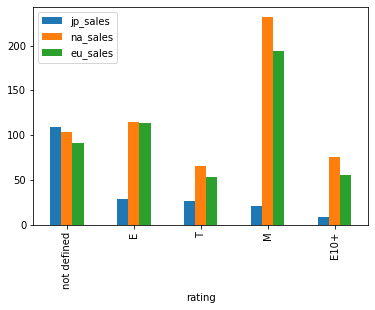

In [52]:
jp_r.join([na_r, eu_r], how='outer').plot(kind='bar')

Теперь пользователей интересуют игры с рейтингом M. 

**Современный партрет пользователя:**

+ `Япония`: пользователь на платформе 3DS играет в ролевую игру, не обращая внимание на рейтинг.

+ `Северная Америка`: пользователь на платформе X360 играет в экшен игру с рейтингом М.

+ `Европа`: пользователь на платформе PS4 играет в экшен с рейтингом М.

<div style="border:solid blue 2px; padding: 20px">
    <p>
        <b>Закономерности:</b>
    <ol>
        <li>Платформы меняются за последние сильно поменялись, что не удивительно, ведь постоянно нужно создавать что-то новое, чтобы заинтересовать покупателей. Остались только X360 и PS3. Эти платформы были лидерами по продажам долгое время и сейчас актуальны, но всё же появилась PS4, которая очень популярная в последние 5 лет.</li>
        <li>В Японии используемые платформы отличаются от платформ в США и Европе, поэтому нельзя выбрать"универнально-популярную" платформу.</li>
        <li>Также можно заметить одну особенность: в Америке любят Xbox, в Европе PlayStation, а в Японии Nintendo DS.</li>
        <li>Экшен - жанр популярный во все времена, однако шутеры и ролевые игры набирают популярность.</li>
        <li>Со временем предпочтение рейтинга меняется. Не исключено, что пользователи могли выбрать игру без рейтинга, но также нельзя исключать фактор, что целевая аудитория растёт, а значит всё чаще будет выбирать рейтинг для пользователей старше 17-18 лет. Однако это касается не всех стран. В Японии почти не обращают внимание на рейтинг ESRB, так как он разработан в основном для США, но при этом им также пользуются в Европе. Стоит учитывать, что локальные рынки не гонятся получить рейтинг ESRB.</li>
    </ol>
    </p>
    
</div>

---

## Сравнение пользовательских рейтингов

На данном этапе мы проверим 2 гипотизы:
+ Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
+ Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую и альтернативную гипотезы по следующим шаблонам:
+ H0: средние двух генеральных совокупностей равны между собой
+ H1: среднее двух генеральной совокупностей не равны между собой

Итак, имеет следующие гипотезы, касаемые платформ:
+ Н0: Средние пользовательские рейтинги платформ Xbox One и PC равны между собой
+ Н1: Средние пользовательские рейтинги платформ Xbox One и PC не равны между собой

И гипотезы, касаемые жанров:
+ Н0: Средние пользовательские рейтинги жанров Action и Sports равны между собой
+ Н1: Средние пользовательские рейтинги жанров Action и Sports не равны между собой

In [53]:
# создадим новый датасет без пропусков в оценках пользователей
data_score = data.dropna(subset=['user_score'])

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам (с обоими пунктами у нас именно такой случай), применим метод `scipy.stats.ttest_ind()`. 

In [54]:
#Проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
from scipy import stats as st
import numpy as np

sample_1 = data_score[data_score['platform'] == 'XOne']['user_score']

sample_2 = data_score[data_score['platform'] == 'PC']['user_score']

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.3037979620149106e-05
Отвергаем нулевую гипотезу


In [55]:
#Проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
from scipy import stats as st
import numpy as np

sample_1 = data_score[data_score['genre'] == 'Action']['user_score']

sample_2 = data_score[data_score['genre'] == 'Sports']['user_score']

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.06480928064420527
Не получилось отвергнуть нулевую гипотезу


<div style="border:solid blue 2px; padding: 20px">
    
    Итак, мы отвергли первую нулевую гипотезу в пользу альтернативной. Во втором случае 
    мы не отвергаем нулевую гипотезу.
    
</div>

---

## Общий вывод

В ходе работы были проделы следующие шаги:
+ сделана преодобработка данных: удалены пропуски, где это возможно, изменён регистр названий колонок, изменены форматы данных.
+ проведён исследовательский анализ данных: проведена работа над количеством проданных игр, продажам по платформам, влиянием отзывов на продажи, распределением по жанрам.
+ составлен портрет пользователей по регионам.
+ проверили гипотезы о равенстве средних по играм и по жанрам.

<div style="border:solid blue 2px; padding: 20px">
    <p>
        <b>Найденные закономерности:</b>
        <li>пик выпуска игр уже прошёл</li>
        <li>пользователи больше прислушиваются к мнению критиков</li>
        <li>средний срок жизни платформы 10 лет</li>
        <li>сложно выявить наиболее подходящую для всех стран платформу, так как в Америке любят Xbox, в Европе PlayStation, а в Японии Nintendo DS</li>
        <li>если всё же необходимо выбрать 1 платформу для рекламы, лучше выбрать PS4, так как это новая, актуальная платформа, которая популярная в Европе и Америке</li>
        <li>с течением времени предпочтения ESRB рейтинга меняются, однако рейтинг Е по прежнему остаётся универсальным</li>
        <li>самым популярным жанром игр является экшен, однако, если вкладываться в рекламу игр в Японии стоит обратить внимание на ролевые игры</li>
        <li>Япония - особенная страна: там не обращают внимание на рейтинг, любят ролевые игры и предпочитают определённую плфтформу DS. Это значит, что рекламную компанию для Японии стоит разрабатывать отдельно и нельзя ожидать отклика от Японии, если в Америке и Европе игра стала популярной.</li>
    </p>
         
    
</div>